In [407]:
# imports
import pandas as pd

import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

In [409]:
# load data
df = pd.read_excel('football_data.xlsx')

In [459]:
# normalize your stats to fit MPL format
['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [413]:
# calculate important values
total_shots = df.shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
total_xG = df['xG'].sum()
xG_per_shot = total_xG / total_shots
points_average_distance = df['X'].mean()
actual_average_distance = 120 - (df['X'] * 1.2).mean()

In [415]:
# set the background color
background_color = '#0C0D0E'

In [417]:
# set the font
import matplotlib.font_manager as font_manager
font_path = 'Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

Text(0.63, 0, '0.12')

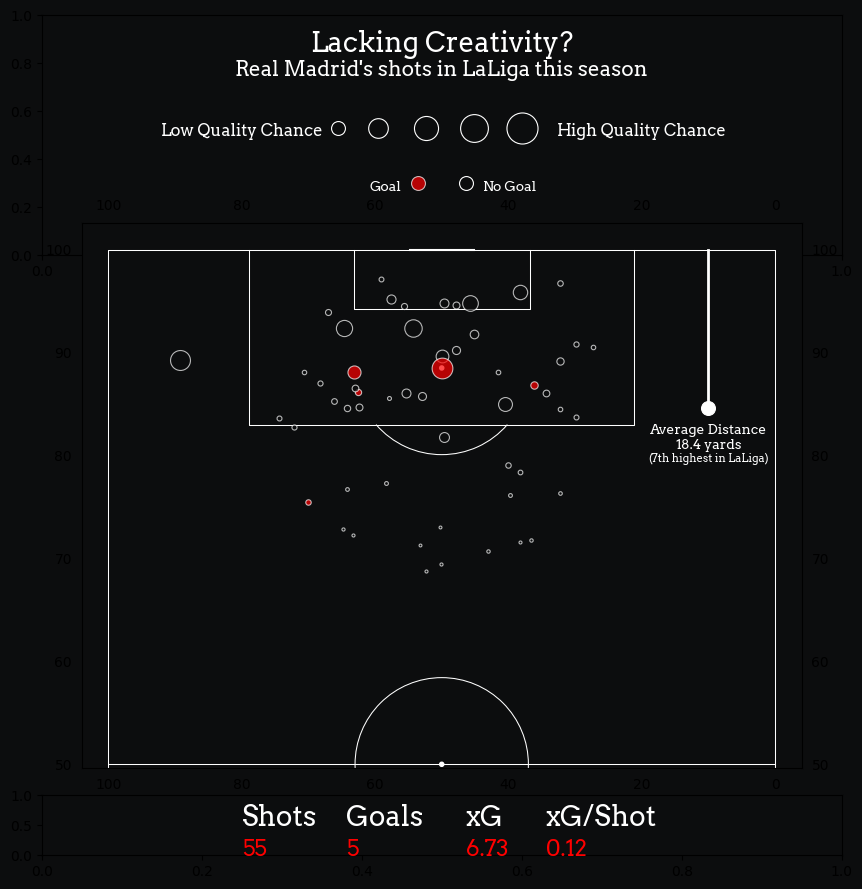

In [447]:
# set background 
fig = plt.figure(figsize = (8, 12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0, .7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

# title
ax1.text(
    x = .5,
    y = .85,
    s = 'Lacking Creativity?',
    fontsize = 20,
    fontproperties = font_props,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

# subtitle 
ax1.text(
    x = .5,
    y = .75,
    s = "Real Madrid's shots in LaLiga this season",
    fontsize = 15,
    fontproperties = font_props,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

# descriptions
ax1.text(
    x = .25,
    y = .5,
    s = "Low Quality Chance",
    fontsize = 12,
    fontproperties = font_props,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

ax1.text(
    x = .75,
    y = .5,
    s = "High Quality Chance",
    fontsize = 12,
    fontproperties = font_props,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

# circles (low - high quality chance)
ax1.scatter(
    x = .37,
    y = .53,
    s = 100,
    color = background_color,
    edgecolor = 'white',
    linewidth = .8
)

ax1.scatter(
    x = .42,
    y = .53,
    s = 200,
    color = background_color,
    edgecolor = 'white',
    linewidth = .8
)

ax1.scatter(
    x = .48,
    y = .53,
    s = 300,
    color = background_color,
    edgecolor = 'white',
    linewidth = .8
)

ax1.scatter(
    x = .54,
    y = .53,
    s = 400,
    color = background_color,
    edgecolor = 'white',
    linewidth = .8
)

ax1.scatter(
    x = .6,
    y = .53,
    s = 500,
    color = background_color,
    edgecolor = 'white',
    linewidth = .8
)

# Goal or No Goal text
ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55,
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='left'
)

# Plot pitch
ax2 = fig.add_axes([.05, .25, .9, .5])
ax2.set_facecolor(background_color)

pitch = VerticalPitch( 
    pitch_type = 'opta',
    half = True, 
    pitch_color = background_color, 
    pad_bottom = .5, 
    line_color = 'white',
    linewidth = .75,
    axis = True, label = True
)

pitch.draw(ax = ax2)

# Average distance line
ax2.scatter(
    x=10, 
    y=points_average_distance, 
    s=100, 
    color='white',  
    linewidth=.8
)
ax2.plot(
    [10, 10], 
    [100, points_average_distance], 
    color='white', 
    linewidth=2
)

# Average distance text
ax2.text(
    x=10, 
    y=points_average_distance - 4, 
    s=f'Average Distance\n{actual_average_distance:.1f} yards', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)
# Average distance subtitle
ax2.text(
    x=10, 
    y=points_average_distance - 5.2, 
    s=f'(7th highest in LaLiga)', 
    fontsize=8, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)

# Plot shots
for x in df.to_dict(orient = 'records'):
    pitch.scatter(
        x['X'], 
        x['Y'], 
        s=300 * x['xG'], 
        color='red' if x['result'] == 'Goal' else background_color, 
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )

ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)

# Stats text
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25, 
    y=.5, 
    s='Shots', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.25, 
    y=0, 
    s=f'{total_shots}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=.5, 
    s='Goals', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=0, 
    s=f'{total_goals}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=.5, 
    s='xG', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=0, 
    s=f'{total_xG:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=.5, 
    s='xG/Shot', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=0, 
    s=f'{xG_per_shot:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

In [457]:
# Export
fig.savefig("plot.png", dpi=300)